# Take Home Exam
## Introduction
This take-home-exam will test the different skills that the student has acquired throughout this exegesis seminar. Among them are:
- formulating exegetical questions
- building TF queries (i.e. transforming exegetical questions into electronic queries)
- visualizing query results with charts (e.g. bar charts, pie charts, scatter plots)
- hyperlinking/referencing Logos/Accordance resources into the markdown cells of this notebook
- text-linguistic analysis of texts
- textual criticism
- critical engagement with the scholarly world


The student is NOT allowed to work together with other students. However, the student can consult the professor and/or his fellow student when it comes to query questions.

The student needs to submit his finished notebook on the Learninghub before the deadline.

## The TF prelude...

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [4]:
A = use('bhsa', hoist=globals())

	connecting to online GitHub repo annotation/app-bhsa ... connected
Using TF-app in /Users/mrkensly/text-fabric-data/annotation/app-bhsa/code:
	rv1.1=#35e4fee27a1cd6f0a5caea9118129349ddb0604e (latest release)
	connecting to online GitHub repo etcbc/bhsa ... connected
Using data in /Users/mrkensly/text-fabric-data/etcbc/bhsa/tf/c:
	rv1.6=#bac4a9f5a2bbdede96ba6caea45e762fe88f88c5 (latest release)
	connecting to online GitHub repo etcbc/phono ... connected
Using data in /Users/mrkensly/text-fabric-data/etcbc/phono/tf/c:
	r1.2=#1ac68e976ee4a7f23eb6bb4c6f401a033d0ec169 (latest release)
	connecting to online GitHub repo etcbc/parallels ... connected
Using data in /Users/mrkensly/text-fabric-data/etcbc/parallels/tf/c:
	r1.2=#395dfe2cb69c261862fab9f0289e594a52121d5c (latest release)
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used


# Task no1: Valence and Theology
1. Read and translate the Hebrew text of <a target="_blank" href="https://ref.ly/1Ki17.22" class="bibleref" title="1 Kings 17:22">1 Kings 17:22</a>&nbsp;<a href="logosres:bhssesb;ref=BibleBHS.1Ki17.22"></a>. Compare different Bible translations and consult three major commentaries (Anchor-Yale Commentary Series, Hermeneia Series, Word Biblical Commentary Series) and focus on how the verbal valence of the first clause of v22 is dealt with.
2. Conduct a verbal valence research for שׁמע and find and document the four most dominant valence constructions.
3. Suggest on the basis of your findings how you should translate the first clause of 1 Kgs 17:22.
4. Would your suggested translation make a theological contribution? If so, what would that contribution be?

You might want to consult two articles published by Glanz-Dyk-Oosting: [JNSL no1](https://works.bepress.com/oliver_glanz/11/), [JNSL no2](https://works.bepress.com/oliver_glanz/17/).


For all what you write it into one or more Markdown cell blocks and create references/hyperlinks to your Logos/Accordance resources wherever possible.

### Task a1.01
##### Translation
וַיִּשְׁמַ֥ע יְהוָ֖ה בְּק֣וֹל אֵלִיָּ֑הוּ וַתָּ֧שָׁב נֶֽפֶשׁ־הַיֶּ֛לֶד עַל־קִרְבֹּ֖ו וַיֶּֽחִי׃

**And (he) listened Yahweh to the voice of Elijah and (she/it) returned the soul of the young one on/to his and he lived.**

We did a text comparison of (<a target="_blank" href="https://ref.ly/logos4/TextComparison?ref=BibleESV.1Ki17.22&amp;res=esv%2cnasb95%2cnrsv%2ckjv1900%2cniv2011%2cnkjv">1 Kings 17:22 </a>) different Bible translation and also checked some major commentaries such as [House](https://ref.ly/logosres/nac08?ref=Bible.1Ki17.17-24). IT appears that as House noted that God was being misunderstood by the Woman. God was ready to move and show his character plainly. In a way all Elijah did was acting as a mouthpiece for God. God heard him because in his creative will, it was already so. In the same vein, Devries from WBC said that God answered Elijah "supplicatory prayer" in the quest of a "formal legitimation" from the part of the women. What we can reap from reading him is that Elijah supplicate not order. Can this be proven? Let us dig in the word.

### Task a1.02
##### Valence
let us conduct a verbal valence research for שׁמע in order to find and document the four most dominant valence constructions.

In [5]:
valence0='''
clause
    phrase function=Pred
        word lex=CM<[
    phrase function=Cmpl|Objc
'''
valence0  = A.search(valence0)
A.table (valence0, start=1, end=20, condensed=True)

  1.58s 632 results


It does look that the verb "shamar" is followed a lot by prepositions. Let us look for these cases.

In [6]:
valence1 = '''
clause
    phrase function=Pred
        word lex=CM<[
    phrase function=Cmpl|Objc
        =: word sp=prep lex_utf8*      
'''
valence1= A.search(valence1)
A.table(valence1, start=1, end=20, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 5:'magenta', 6:'cyan'})

  2.98s 441 results


n,p,clause,phrase,word,phrase,word
1,Genesis 3:8,וַֽיִּשְׁמְע֞וּ אֶת־קֹ֨ול יְהוָ֧ה אֱלֹהִ֛ים,יִּשְׁמְע֞וּ,יִּשְׁמְע֞וּ,אֶת־קֹ֨ול יְהוָ֧ה אֱלֹהִ֛ים,אֶת־
2,Genesis 3:10,אֶת־קֹלְךָ֥ שָׁמַ֖עְתִּי בַּגָּ֑ן,שָׁמַ֖עְתִּי,שָׁמַ֖עְתִּי,אֶת־קֹלְךָ֥,אֶת־
3,Genesis 3:17,כִּ֥י־שָׁמַעְתָּ֮ לְקֹ֣ול אִשְׁתֶּךָ֒,שָׁמַעְתָּ֮,שָׁמַעְתָּ֮,לְקֹ֣ול אִשְׁתֶּךָ֒,לְ
4,Genesis 16:2,וַיִּשְׁמַ֥ע אַבְרָ֖ם לְקֹ֥ול שָׂרָֽי׃,יִּשְׁמַ֥ע,יִּשְׁמַ֥ע,לְקֹ֥ול שָׂרָֽי׃,לְ
5,Genesis 16:11,כִּֽי־שָׁמַ֥ע יְהוָ֖ה אֶל־עָנְיֵֽךְ׃,שָׁמַ֥ע,שָׁמַ֥ע,אֶל־עָנְיֵֽךְ׃,אֶל־
6,Genesis 21:12,כֹּל֩ שְׁמַ֣ע בְּקֹלָ֑הּ,שְׁמַ֣ע,שְׁמַ֣ע,בְּקֹלָ֑הּ,בְּ
7,Genesis 21:17,וַיִּשְׁמַ֣ע אֱלֹהִים֮ אֶת־קֹ֣ול הַנַּעַר֒,יִּשְׁמַ֣ע,יִּשְׁמַ֣ע,אֶת־קֹ֣ול הַנַּעַר֒,אֶת־
8,Genesis 21:17,כִּֽי־שָׁמַ֧ע אֱלֹהִ֛ים אֶל־קֹ֥ול הַנַּ֖עַר,שָׁמַ֧ע,שָׁמַ֧ע,אֶל־קֹ֥ול הַנַּ֖עַר,אֶל־
9,Genesis 22:18,עֵ֕קֶב אֲשֶׁ֥ר שָׁמַ֖עְתָּ בְּקֹלִֽי׃,שָׁמַ֖עְתָּ,שָׁמַ֖עְתָּ,בְּקֹלִֽי׃,בְּ
10,Genesis 23:16,וַיִּשְׁמַ֣ע אַבְרָהָם֮ אֶל־עֶפְרֹון֒,יִּשְׁמַ֣ע,יִּשְׁמַ֣ע,אֶל־עֶפְרֹון֒,אֶל־


In order for us to have a better view of these constructions, let us import our results in "panda dataframe"

In [7]:
A.export(valence1, toDir='/Users/mrkensly/Desktop/SOT/notebooks', toFile='valence1.tsv')

In [8]:
valence1=pd.read_csv('/Users/mrkensly/Desktop/SOT/notebooks/valence1.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 80)
valence1.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,lex_utf85,sp5
0,1,Genesis,3,8,427804,clause,וַֽיִּשְׁמְע֞וּ אֶת־קֹ֨ול יְהוָ֧ה אֱלֹהִ֛ים,652294,phrase,יִּשְׁמְע֞וּ,Pred,1316,word,יִּשְׁמְע֞וּ,CM<[,652295,phrase,אֶת־קֹ֨ול יְהוָ֧ה אֱלֹהִ֛ים,Objc,1317,word,אֶת־,את,prep
1,2,Genesis,3,10,427811,clause,אֶת־קֹלְךָ֥ שָׁמַ֖עְתִּי בַּגָּ֑ן,652315,phrase,שָׁמַ֖עְתִּי,Pred,1359,word,שָׁמַ֖עְתִּי,CM<[,652314,phrase,אֶת־קֹלְךָ֥,Objc,1357,word,אֶת־,את,prep
2,3,Genesis,3,17,427845,clause,כִּ֥י־שָׁמַעְתָּ֮ לְקֹ֣ול אִשְׁתֶּךָ֒,652411,phrase,שָׁמַעְתָּ֮,Pred,1503,word,שָׁמַעְתָּ֮,CM<[,652412,phrase,לְקֹ֣ול אִשְׁתֶּךָ֒,Cmpl,1504,word,לְ,ל,prep
3,4,Genesis,16,2,428808,clause,וַיִּשְׁמַ֥ע אַבְרָ֖ם לְקֹ֥ול שָׂרָֽי׃,655434,phrase,יִּשְׁמַ֥ע,Pred,7065,word,יִּשְׁמַ֥ע,CM<[,655436,phrase,לְקֹ֥ול שָׂרָֽי׃,Cmpl,7067,word,לְ,ל,prep
4,5,Genesis,16,11,428847,clause,כִּֽי־שָׁמַ֥ע יְהוָ֖ה אֶל־עָנְיֵֽךְ׃,655554,phrase,שָׁמַ֥ע,Pred,7239,word,שָׁמַ֥ע,CM<[,655556,phrase,אֶל־עָנְיֵֽךְ׃,Cmpl,7241,word,אֶל־,אל,prep


In [9]:
valence1 ["lex_utf85"].value_counts()

את    148
אל    114
ב     109
ל      49
על     15
מן      4
עם      1
כ       1
Name: lex_utf85, dtype: int64

We have found and can now document that **"Shamar"** mostly appears followed by the prepositions **"et", "el", "be", and "le".**

### Task a1.03
How should we translate the first clause of <a target="_blank" href="https://ref.ly/1Ki17.22" class="bibleref" title="1 Kings 17:22">1 Kings 17:22</a>&nbsp;<a href="logosres:bhssesb;ref=BibleBHS.1Ki17.22"></a>. In our case study, God is the subject of the verb. How do these constructions behave when the subject is not God himself. 

In [10]:
valence2 = '''
clause
    phrase function=Subj
        word sp=nmpr lex#JHWH/|>L/|>LHJM/
    phrase function=Pred
        word lex=CM<[
    phrase function=Cmpl|Objc
        =: word sp=prep lex=>L|L|B|>T
'''
valence2= A.search(valence2)
A.table(valence2, start=1, end=74, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 5:'magenta', 6:'cyan'})



  3.86s 74 results


n,p,clause,phrase,word,phrase,word,phrase,word
1,Genesis 16:2,וַיִּשְׁמַ֥ע אַבְרָ֖ם לְקֹ֥ול שָׂרָֽי׃,אַבְרָ֖ם,אַבְרָ֖ם,יִּשְׁמַ֥ע,יִּשְׁמַ֥ע,לְקֹ֥ול שָׂרָֽי׃,לְ
2,Genesis 23:16,וַיִּשְׁמַ֣ע אַבְרָהָם֮ אֶל־עֶפְרֹון֒,אַבְרָהָם֮,אַבְרָהָם֮,יִּשְׁמַ֣ע,יִּשְׁמַ֣ע,אֶל־עֶפְרֹון֒,אֶל־
3,Genesis 24:52,כַּאֲשֶׁ֥ר שָׁמַ֛ע עֶ֥בֶד אַבְרָהָ֖ם אֶת־דִּבְרֵיהֶ֑ם,עֶ֥בֶד אַבְרָהָ֖ם,אַבְרָהָ֖ם,שָׁמַ֛ע,שָׁמַ֛ע,אֶת־דִּבְרֵיהֶ֑ם,אֶת־
4,Genesis 26:5,עֵ֕קֶב אֲשֶׁר־שָׁמַ֥ע אַבְרָהָ֖ם בְּקֹלִ֑י,אַבְרָהָ֖ם,אַבְרָהָ֖ם,שָׁמַ֥ע,שָׁמַ֥ע,בְּקֹלִ֑י,בְּ
5,Genesis 27:34,כִּשְׁמֹ֤עַ עֵשָׂו֙ אֶת־דִּבְרֵ֣י אָבִ֔יו,עֵשָׂו֙,עֵשָׂו֙,כִּשְׁמֹ֤עַ,שְׁמֹ֤עַ,אֶת־דִּבְרֵ֣י אָבִ֔יו,אֶת־
6,Genesis 28:7,וַיִּשְׁמַ֣ע יַעֲקֹ֔ב אֶל־אָבִ֖יו וְאֶל־אִמֹּ֑ו,יַעֲקֹ֔ב,יַעֲקֹ֔ב,יִּשְׁמַ֣ע,יִּשְׁמַ֣ע,אֶל־אָבִ֖יו וְאֶל־אִמֹּ֑ו,אֶל־
7,Genesis 29:13,כִשְׁמֹ֨עַ לָבָ֜ן אֶת־שֵׁ֣מַע׀ יַעֲקֹ֣ב בֶּן־אֲחֹתֹ֗ו,לָבָ֜ן,לָבָ֜ן,כִשְׁמֹ֨עַ,שְׁמֹ֨עַ,אֶת־שֵׁ֣מַע׀ יַעֲקֹ֣ב בֶּן־אֲחֹתֹ֗ו,אֶת־
8,Exodus 6:12,בְּנֵֽי־יִשְׂרָאֵל֙ לֹֽא־שָׁמְע֣וּ אֵלַ֔י,בְּנֵֽי־יִשְׂרָאֵל֙,יִשְׂרָאֵל֙,שָׁמְע֣וּ,שָׁמְע֣וּ,אֵלַ֔י,אֵלַ֔י
9,Exodus 18:1,וַיִּשְׁמַ֞ע יִתְרֹ֨ו כֹהֵ֤ן מִדְיָן֙ חֹתֵ֣ן מֹשֶׁ֔ה אֵת֩ כָּל־,יִתְרֹ֨ו כֹהֵ֤ן מִדְיָן֙ חֹתֵ֣ן מֹשֶׁ֔ה,יִתְרֹ֨ו,יִּשְׁמַ֞ע,יִּשְׁמַ֞ע,אֵת֩ כָּל־,אֵת֩
10,Exodus 18:1,וַיִּשְׁמַ֞ע יִתְרֹ֨ו כֹהֵ֤ן מִדְיָן֙ חֹתֵ֣ן מֹשֶׁ֔ה אֵת֩ כָּל־,יִתְרֹ֨ו כֹהֵ֤ן מִדְיָן֙ חֹתֵ֣ן מֹשֶׁ֔ה,מִדְיָן֙,יִּשְׁמַ֞ע,יִּשְׁמַ֞ע,אֵת֩ כָּל־,אֵת֩


### Our preliminary observations are the following
- when "**Shamar**" is followed by the preposition "**le**", it seems that the idea is "obeying." For example, Abraham in [Gen 16:2](https://ref.ly/logosres/esv?ref=BibleESV.Ge16.2) obeyed Sarah directive. In [Ex 18:24](https://ref.ly/logosres/esv?ref=BibleESV.Ex18.24), Moses obeyed and did as his father in law counseled him. ect...

- with "**et**", it seems that the conotation is just auditive sense; the faculty of simply hearing something. For example Athaliah literally heard the noise of the people in [2 chr 23:12](https://ref.ly/logosres/esv?ref=BibleESV.2Ch23.12). Job's friends literally heard the news of his situation [Job 2:11](https://ref.ly/logosres/esv?ref=BibleESV.Job2.11).

- With "**be**" "shamar" seems to have a connotation of not merely listenning but acted upon understanding and beliefs. The evidences in the biblical data are we suggest are the following:in [Gen 26:5](https://ref.ly/logosres/esv?ref=BibleESV.Ge26.5) Abraham obeyed as to believed and did accordingly. Saul not only listen but also understood the point Jonathan was making and acted proportionately [1 Sam 19:6](https://ref.ly/logosres/esv?ref=BibleESV.1Sa19.6). In [Jer 43:4](https://ref.ly/logosres/esv?ref=BibleESV.Je43.4), Johanan did not believe in the word of God.

- with **"el"** seems to indicate the indirect object by answering the question "to whom" did subject "A" listened to. Example [Gen 28:7](https://ref.ly/logosres/esv?ref=BibleESV.Ge28.7) [Judges 11:28](https://ref.ly/logosres/esv?ref=BibleESV.Jdg11.28).

#### What happens when God is the subject? Let us find out.

In [11]:
valence3 = '''
clause
    phrase function=Subj
        word lex=JHWH/|>L/|>LHJM/
    phrase function=Pred
        word lex=CM<[
    phrase function=Cmpl|Objc
        =: word sp=prep lex=>L|L|B|>T 
'''
valence3= A.search(valence3)
A.table(valence3, start=1, end=27, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 5:'magenta', 6:'cyan'})


  3.37s 27 results


n,p,clause,phrase,word,phrase,word,phrase,word
1,Genesis 16:11,כִּֽי־שָׁמַ֥ע יְהוָ֖ה אֶל־עָנְיֵֽךְ׃,יְהוָ֖ה,יְהוָ֖ה,שָׁמַ֥ע,שָׁמַ֥ע,אֶל־עָנְיֵֽךְ׃,אֶל־
2,Genesis 21:17,וַיִּשְׁמַ֣ע אֱלֹהִים֮ אֶת־קֹ֣ול הַנַּעַר֒,אֱלֹהִים֮,אֱלֹהִים֮,יִּשְׁמַ֣ע,יִּשְׁמַ֣ע,אֶת־קֹ֣ול הַנַּעַר֒,אֶת־
3,Genesis 21:17,כִּֽי־שָׁמַ֧ע אֱלֹהִ֛ים אֶל־קֹ֥ול הַנַּ֖עַר,אֱלֹהִ֛ים,אֱלֹהִ֛ים,שָׁמַ֧ע,שָׁמַ֧ע,אֶל־קֹ֥ול הַנַּ֖עַר,אֶל־
4,Genesis 30:17,וַיִּשְׁמַ֥ע אֱלֹהִ֖ים אֶל־לֵאָ֑ה,אֱלֹהִ֖ים,אֱלֹהִ֖ים,יִּשְׁמַ֥ע,יִּשְׁמַ֥ע,אֶל־לֵאָ֑ה,אֶל־
5,Genesis 30:22,וַיִּשְׁמַ֤ע אֵלֶ֨יהָ֙ אֱלֹהִ֔ים,אֱלֹהִ֔ים,אֱלֹהִ֔ים,יִּשְׁמַ֤ע,יִּשְׁמַ֤ע,אֵלֶ֨יהָ֙,אֵלֶ֨יהָ֙
6,Exodus 2:24,וַיִּשְׁמַ֥ע אֱלֹהִ֖ים אֶת־נַאֲקָתָ֑ם,אֱלֹהִ֖ים,אֱלֹהִ֖ים,יִּשְׁמַ֥ע,יִּשְׁמַ֥ע,אֶת־נַאֲקָתָ֑ם,אֶת־
7,Exodus 16:8,בִּשְׁמֹ֤עַ יְהוָה֙ אֶת־תְּלֻנֹּ֣תֵיכֶ֔ם,יְהוָה֙,יְהוָה֙,בִּשְׁמֹ֤עַ,שְׁמֹ֤עַ,אֶת־תְּלֻנֹּ֣תֵיכֶ֔ם,אֶת־
8,Numbers 21:3,וַיִּשְׁמַ֨ע יְהוָ֜ה בְּקֹ֣ול יִשְׂרָאֵ֗ל,יְהוָ֜ה,יְהוָ֜ה,יִּשְׁמַ֨ע,יִּשְׁמַ֨ע,בְּקֹ֣ול יִשְׂרָאֵ֗ל,בְּ
9,Deuteronomy 1:34,וַיִּשְׁמַ֥ע יְהוָ֖ה אֶת־קֹ֣ול דִּבְרֵיכֶ֑ם,יְהוָ֖ה,יְהוָ֖ה,יִּשְׁמַ֥ע,יִּשְׁמַ֥ע,אֶת־קֹ֣ול דִּבְרֵיכֶ֑ם,אֶת־
10,Deuteronomy 1:45,וְלֹֽא־שָׁמַ֤ע יְהוָה֙ בְּקֹ֣לְכֶ֔ם,יְהוָה֙,יְהוָה֙,שָׁמַ֤ע,שָׁמַ֤ע,בְּקֹ֣לְכֶ֔ם,בְּ


In [12]:
A.export(valence3, toDir='/Users/mrkensly/Desktop/SOT/notebooks', toFile='valence3.tsv')

In [13]:
valence3=pd.read_csv('/Users/mrkensly/Desktop/SOT/notebooks/valence3.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
valence3.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,lex5,NODE6,TYPE6,TEXT6,function6,NODE7,TYPE7,TEXT7,lex7,sp7
0,1,Genesis,16,11,428847,clause,כִּֽי־שָׁמַ֥ע יְהוָ֖ה אֶל־עָנְיֵֽךְ׃,655555,phrase,יְהוָ֖ה,Subj,7240,word,יְהוָ֖ה,JHWH/,655554,phrase,שָׁמַ֥ע,Pred,7239,word,שָׁמַ֥ע,CM<[,655556,phrase,אֶל־עָנְיֵֽךְ׃,Cmpl,7241,word,אֶל־,>L,prep
1,2,Genesis,21,17,429420,clause,וַיִּשְׁמַ֣ע אֱלֹהִים֮ אֶת־קֹ֣ול הַנַּעַר֒,657300,phrase,אֱלֹהִים֮,Subj,9905,word,אֱלֹהִים֮,>LHJM/,657299,phrase,יִּשְׁמַ֣ע,Pred,9904,word,יִּשְׁמַ֣ע,CM<[,657301,phrase,אֶת־קֹ֣ול הַנַּעַר֒,Objc,9906,word,אֶת־,>T,prep
2,3,Genesis,21,17,429426,clause,כִּֽי־שָׁמַ֧ע אֱלֹהִ֛ים אֶל־קֹ֥ול הַנַּ֖עַר,657317,phrase,אֱלֹהִ֛ים,Subj,9929,word,אֱלֹהִ֛ים,>LHJM/,657316,phrase,שָׁמַ֧ע,Pred,9928,word,שָׁמַ֧ע,CM<[,657318,phrase,אֶל־קֹ֥ול הַנַּ֖עַר,Cmpl,9930,word,אֶל־,>L,prep
3,4,Genesis,30,17,430749,clause,וַיִּשְׁמַ֥ע אֱלֹהִ֖ים אֶל־לֵאָ֑ה,661251,phrase,אֱלֹהִ֖ים,Subj,15864,word,אֱלֹהִ֖ים,>LHJM/,661250,phrase,יִּשְׁמַ֥ע,Pred,15863,word,יִּשְׁמַ֥ע,CM<[,661252,phrase,אֶל־לֵאָ֑ה,Cmpl,15865,word,אֶל־,>L,prep
4,5,Genesis,30,22,430766,clause,וַיִּשְׁמַ֤ע אֵלֶ֨יהָ֙ אֱלֹהִ֔ים,661313,phrase,אֱלֹהִ֔ים,Subj,15939,word,אֱלֹהִ֔ים,>LHJM/,661311,phrase,יִּשְׁמַ֤ע,Pred,15937,word,יִּשְׁמַ֤ע,CM<[,661312,phrase,אֵלֶ֨יהָ֙,Cmpl,15938,word,אֵלֶ֨יהָ֙,>L,prep


In [14]:
valence3 ["TEXT7"].value_counts()

אֶת־          8
אֶל־          5
בְּ           5
אֵ֣ת׀         4
אֵלַ֔י        2
אֵלֶ֨יהָ֙     1
אֲלֵיכֶ֖ם     1
אֵלָיו֙       1
Name: TEXT7, dtype: int64

As we can appreciate, "God" is never the subject when **"shamar"** is followed by **"le"**. Basically we are left with the cases when God is the Subject and "Shamar" appears with ["et"](https://ref.ly/logos4/PassageList?title=Shamar+%2b+et) with ["el"](https://ref.ly/logos4/PassageList?title=Shamar+%2b+el) and in our case with ["be"](https://ref.ly/logos4/PassageList?title=Shamar+%2b+be) 
1. we can safely rule out that in this context, God did not obey Elijah but,
2. He listened to his supplications with understanding and decided in his creative will to act upong it. There are times that the Israelites complained to God but He simply does not act out his power to deliver like in [Deut 1:45](https://ref.ly/logosres/esv?ref=BibleESV.Dt1.45) so,
3. The best way to translate "וַיִּשְׁמַ֥ע יְהוָ֖ה בְּקֹ֣ול אֵלִיָּ֑הוּ" And God "willingly" listened to Elijah 



### Consolidation  of our hypothesis
Listening to someone voice, perhaps may convey to the listeners an equivoque idea or meaning.Therefore let us look at the few cases where **shamar** appears with **be** when **be** is not followed by the almost omnimous **qwl**

In [15]:
valence4 = '''
clause
    phrase function=Pred
        word lex=CM<[
    phrase function=Cmpl|Objc
        =: word sp=prep lex=B
        <: word lex#QWL/ 
'''
valence4= A.search(valence4)
A.table(valence4, start=1, end=27, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 5:'magenta', 6:'cyan'})

  3.27s 11 results


n,p,clause,phrase,word,phrase,word,word
1,1_Kings 8:52,לִשְׁמֹ֣עַ אֲלֵיהֶ֔ם בְּכֹ֖ל,לִשְׁמֹ֣עַ,שְׁמֹ֣עַ,בְּכֹ֖ל,בְּ,כֹ֖ל
2,Isaiah 42:24,וְלֹ֥א שָׁמְע֖וּ בְּתֹורָתֹֽו׃,שָׁמְע֖וּ,שָׁמְע֖וּ,בְּתֹורָתֹֽו׃,בְּ,תֹורָתֹֽו׃
3,Jeremiah 4:5,וּבִירוּשָׁלִַ֨ם֙ הַשְׁמִ֔יעוּ,הַשְׁמִ֔יעוּ,הַשְׁמִ֔יעוּ,בִירוּשָׁלִַ֨ם֙,בִ,ירוּשָׁלִַ֨ם֙
4,Jeremiah 26:11,כַּאֲשֶׁ֥ר שְׁמַעְתֶּ֖ם בְּאָזְנֵיכֶֽם׃,שְׁמַעְתֶּ֖ם,שְׁמַעְתֶּ֖ם,בְּאָזְנֵיכֶֽם׃,בְּ,אָזְנֵיכֶֽם׃
5,Jeremiah 31:15,קֹ֣ול בְּרָמָ֤ה נִשְׁמָע֙,נִשְׁמָע֙,נִשְׁמָע֙,בְּרָמָ֤ה,בְּ,רָמָ֤ה
6,Jeremiah 46:14,וְהַשְׁמִ֣יעוּ בְמִגְדֹּ֔ול,הַשְׁמִ֣יעוּ,הַשְׁמִ֣יעוּ,בְמִגְדֹּ֔ול,בְ,מִגְדֹּ֔ול
7,Jeremiah 46:14,וְהַשְׁמִ֥יעוּ בְנֹ֖ף וּבְתַחְפַּנְחֵ֑ס,הַשְׁמִ֥יעוּ,הַשְׁמִ֥יעוּ,בְנֹ֖ף וּבְתַחְפַּנְחֵ֑ס,בְ,נֹ֖ף
8,Jeremiah 50:46,וּזְעָקָ֖ה בַּגֹּויִ֥ם נִשְׁמָֽע׃ ס,נִשְׁמָֽע׃ ס,נִשְׁמָֽע׃ ס,בַּגֹּויִ֥ם,בַּ,
9,Psalms 44:2,בְּאָזְנֵ֬ינוּ שָׁמַ֗עְנוּ,שָׁמַ֗עְנוּ,שָׁמַ֗עְנוּ,בְּאָזְנֵ֬ינוּ,בְּ,אָזְנֵ֬ינוּ
10,Job 37:2,שִׁמְע֤וּ שָׁמֹ֣ועַ בְּרֹ֣גֶז קֹלֹ֑ו,שִׁמְע֤וּ,שִׁמְע֤וּ,בְּרֹ֣גֶז קֹלֹ֑ו,בְּ,רֹ֣גֶז


Even in these few cases, we can remarked that what is important is not merely the words being pronounced but the wealth of meanning behind them. For instance in [1 Chr 17:20](https://ref.ly/logosres/esv?ref=BibleESV.1Ch17.20) what they have heard is the Story of the covenantal God. Therefore God in acting in the case of the story of 1 Kings, acted within the sphere of his covenant with his people.

### Task a1.04
Theological Contributions
- God does not obey human being
- God is compassionate to the cries of his children and answers to them accordingly
- God is sovereign and is not anyone "genie lamp"
- Let God be God. As finite creature, we ought to learn to always accept his will for his purposes surpases all of our understandings

# Task no2: Highlighting and Notetaking in Logos/Accordance
1. Create a note for 1 Kgs 17:22 in your BibleSoftware that contains a summary of your findings regarding `Task no1`. Create a screenshot of it.
2. Do some color highlighting of your BHS text for 1 Kgs 17:22 and create a screenshot of it.
3. Publish both screenshots in a markdown cell. Make sure you save the screenshots in the `PNG` format (not JPEG), and follow the instructions here: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet. Or look at my former notebooks to see how I did it.

### Task a2.01
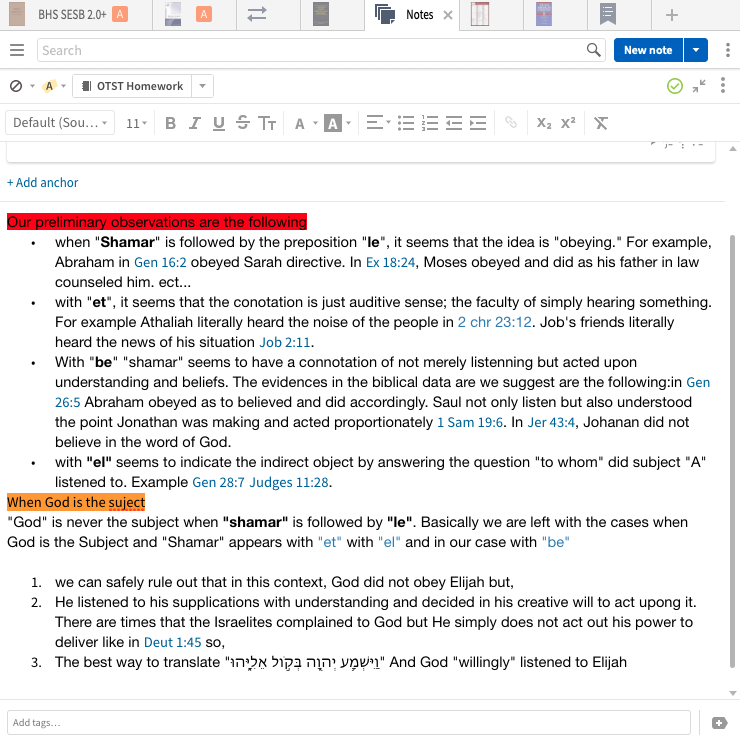

### Task a2.02
![See screenshots](attachment:Screen%20Shot%202019-07-02%20at%206.06.23%20AM.png "Highlighting example")
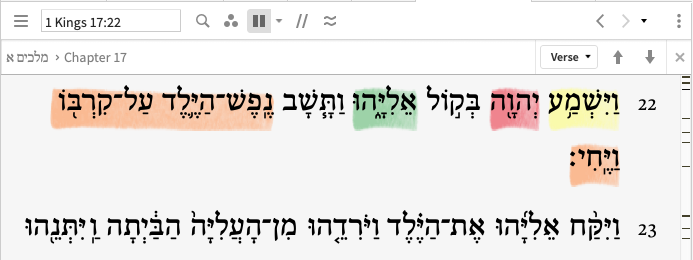

# Task no3: Visualization
Visualize with a bar chart the four most frequent valence patterns that you found in Task no1. Again, consult earlier notebooks to see how this is done.

### Task a3

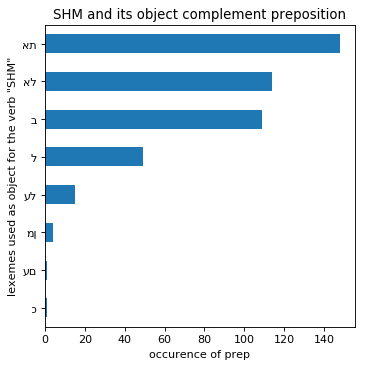

In [16]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
valence1.groupby("lex_utf85").size().sort_values(ascending=True).plot.barh()
plt.xlabel('occurence of prep')
plt.ylabel('lexemes used as object for the verb "SHM"')
plt.title('SHM and its object complement preposition')
plt.show()

# Task no4: Textual Criticism
1. Look at form  שָׁבַ֣רְתִּי in [Jeremiah 2:20 (BHS-etcb 2017)](https://shebanq.ancient-data.org/hebrew/text?qactive=hlcustom&qsel_one=grey&qpub=x&qget=v&wactive=hlcustom&wsel_one=gray&wpub=x&wget=v&nactive=hlcustom&nsel_one=black&npub=v&nget=x&chapter=2&lang=en&book=Jeremia&qw=q&tr=hb&tp=txt_p&iid=3479&verse=20&version=2017&mr=m&page=1&c_w1JHWHn=lilac&wd4_statfl=v&ph_arela=v&wd4_statrl=v&sn_an=v&cl=v&wd1_lang=x&wd1_subpos=x&wd2_person=v&sp_rela=v&wd1_pdp=x&sn_n=v&wd3_uvf=x&ph_fun=v&wd1_nmtp=v&gl=v&sp_n=v&pt=x&ph_an=v&ph_typ=x&cl_typ=v&tt=x&wd4_statro=x&wd3_vbs=x&wd1=x&tl=v&wd3=x&wd4=x&wd2_gender=v&ph=v&wd3_vbe=v&wd1_pos=v&ph_det=v&ph_rela=x&wd4_statfo=x&tl_tlv=x&wd2_stem=v&wd2_state=v&ht=v&ph_n=v&tl_tlc=v&cl_tab=v&wd3_nme=x&hl=v&cl_par=v&cl_an=v&cl_n=v&wd3_prs=v&wd3_pfm=x&sp=v&cl_code=v&ht_hk=v&wd2=x&hl_hlc=v&cl_rela=v&wd2_gnumber=v&wd2_tense=v&cl_txt=v&wd1_n=x&sn=v&ht_ht=v&hl_hlv=x&pref=alt)

**Answer**: I did

2. If you had to morphologically analyze the form, how would you analyze it (Person, Number, Gender, etc.)?

**Answer**:1st common sing

3. Compare 4 English translations and see how they translate the form. Hyperlink each translation you are discussing.

**Answer**: They all, <a target="_blank" href="https://ref.ly/logos4/TextComparison?ref=BibleESV.Je2.20&amp;res=esv%2cnasb95%2cnrsv%2ckjv1900%2cniv2011">Jeremiah 2:20 (Text Comparison)</a> translate the verb as **1cs**

4. Have a look at the GT and see what the GT is doing with this form. Hyperlink the GT text.

**Answer**: The [GT](https://ref.ly/logosres/lxxsesb?ref=BibleLXX.Je2.20) text uses the verb in "second person singular"
5. Now consult your Bible Software's Biblica Hebraica(s). How did they morphologically analyze the form. If you have more than just one Hebrew database, compare them with each other.

**Answer**: My Bible Software rendered this form morphologically as a **2fs**
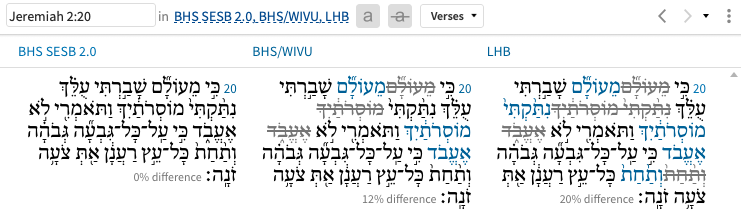
6. Now check Holladay's commentary on Jer 2:20 and see whether he discusses this form.

**Answer**: Mr Hollady's [commentary](https://ref.ly/logosres/hrmneia24ajr?ref=BibleBHS.Je2.20) did not go deep into describing the form being used. The commentary accentuate more the meanning of the yoke and its belonging.
7. Build a TF query that finds all perfect TJ endings that are morphologically not interpreted in the ETCBC database as 1sgC. Before you do so, study the next markdown and code cells as they provide you with the necessary information to write your search.
8. How often and where does the ETCBC database deviate from the standard the paradigmatic TJ interpretation (1, sg, c)?
9. What is your opinion on the matter? What would be the best way to handle those cases that you found to be deviating from the paradigmatic standard? Consult a comprehensive grammar (Joüon-Muraoka, Gesenius) before you make a final decision.

# Perfect/Qatal "T" endings as non 2sgF
Sometimes, translations, scholars, databases and commentaries deviate from the paradigmatic interpretation of verbal forms. Fortunately, the ETCBC database allows scholars to search for both the graphical forms of verbal forms with the word feature `g_cons` and the morphological interpretations by the features `ps`,  `nu`,  `gn`, `vt` etc...


In combination with regular expressions (initiated by `~`) and `g_cons` we can search for exactly the verbal forms we are interested in. For example, the typical T ending of a 2sgF perfect/qatal form could be found with

```
word g_cons~.*T$ ps#p2 gn#F vt=perf qere* g_word_utf8* language=Hebrew
```

In this case we are looking for the ending "T" ("T" stands at the end as it is followed by the regular expression `$` marking the end of the word) in ver perfect/qatal verbal form that is NOT morphologically interpreted as 2nd person (`ps#2`) feminine (`gn#F`).

If we distinguish between ketiv, qere and orthographic variations its handy to compare the different display options of `fmt`:
![](https://ger5jq.dm.files.1drv.com/y4mgBcG6b0O4xJY9Klqugq7Y3rgBudJZogZemT3pzjZkr2sPPbLbLxogwr_OOo5WX7qvT_ga8g8jr0OWRsRiP-bFOq1Hluf2hUWHNmaxKoV2H8vJzaEWNVb3t0N99oHCj_fYKZKVX5c3A6jO4HaW86khHcrIQfqMQ78VlbUPEQFxcEeRi90vf79m30I1WDrGhOAo0Z4dS1URHQbXY5qkFEtDQ/Annotation%202019-06-21%20084006.png?psid=1)

You can see what formats have been setup by running the command `T.formats`.

![](https://5cqr6g.dm.files.1drv.com/y4mxqaTxPDk8XO6Bha4juY9y83Tbu_G1mNlCgngh5fitUVMxG2LUCMAiYdjWmN91woRXGX2jIPR7qA3SdaDTz6B3LB_-1ifJMxa_p43BsD3NkxowB9SKCSjUpNnkVvqE1BeF3g_5VO4-6VhayTepQPXs-_n2Nk8BNkqZ_CKEwJRPatH---htBs-kdHyzkDgB-7r0MP0a3ev-vgvywfZfOO1bg/Annotation%202019-06-21%20085501.png?psid=1)

One can use for example the handy configuration: `extraFeatures='qere_utf8', fmt='text-orig-full-ketiv'` as it will show both the qere and the ketiv.

The feature ```g_word_utf8``` alway shows the ketiv! When there is a ketiv-qere issue, the `g_word_utf8` will show no vowel indicators while the ```qere_utf8``` will show the qere vowels:

![](https://slsqsa.dm.files.1drv.com/y4mit9PKgHtWg4Jtun-ZLmCyFYzBjgXOUF2_a56dTtNYstqrYzIgTHatl8clcZRNuv5UyhPDUdjl32DxCtECR3pfD1dOFtl9Ikg0M0kYuJgwmFOJH4GUi1fcOWc3qLHBQTjbVPsMDundHADXxUIQOGNZAUDfLVhmo7eD1I0Z3ZR8sSMexMxC50sBK4in5gTPotOmp8mU3lIsICtE4Gk7rI7sA/Annotation%202019-06-21%20104755.png?psid=1)


Let’s search for all those cases where a qatal/perfect "T" ending is not taken as 2sgF but as 1sgC.


In [17]:
Tis1sgC = '''
book book*
    word sp=verb g_cons~.*T$ ps=p1 gn#F vt=perf qere* g_word_utf8* language=Hebrew
'''
Tis1sgC  = A.search(Tis1sgC)
A.show(Tis1sgC, start=1, end=4, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={2:'yellow'})
A.table(Tis1sgC, start=1, end=4, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={2:'yellow'})

  1.08s 4 results


n,p,book,word
1,1_Kings 8:48,,בנית
2,Ezekiel 16:59,,עשׂית
3,Psalms 140:13,,ידעת
4,Job 42:2,,ידעת


In [18]:
T.formats

{'lex-default': 'word',
 'lex-orig-full': 'word',
 'lex-orig-plain': 'word',
 'lex-trans-full': 'word',
 'lex-trans-plain': 'word',
 'text-orig-full': 'word',
 'text-orig-full-ketiv': 'word',
 'text-orig-plain': 'word',
 'text-phono-full': 'word',
 'text-trans-full': 'word',
 'text-trans-full-ketiv': 'word',
 'text-trans-plain': 'word'}

Now you can complete Task no4.

### Task a4.07
Build a TF query that finds all perfect TJ endings that are morphologically not interpreted in the ETCBC database as 1sgC. Before you do so, study the next markdown and code cells as they provide you with the necessary information to write your search

In [19]:
Tis1sgC1 = '''
book book*
    word sp=verb g_cons~.*TJ$ ps#p1 gn#c vt=perf qere* g_word_utf8* language=Hebrew
'''
Tis1sgC1  = A.search(Tis1sgC1)
A.show(Tis1sgC1, start=1, end=4, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={2:'yellow'})
A.table(Tis1sgC1, start=1, end=4, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={2:'yellow'})

  0.92s 21 results


n,p,book,word
1,Jeremiah 2:20,,שָׁבַ֣רְתִּי
2,Jeremiah 2:20,,נִתַּ֨קְתִּי֙
3,Jeremiah 2:33,,למדתי
4,Jeremiah 3:4,,קראתי


### Task a4.08
How often and where does the ETCBC database deviate from the standard the paradigmatic TJ interpretation (1, sg, c)?

**Answer**: It deviates **4 times**

### Task a4.09
Truth be told, it caused me a headache at the beginning. How is it that the translation is perhaps right but the parsing is totally different. Truly without this querry there would be no way of making sense of this phenomena. Now when it comes to Jer 2:20, I understand the morphological changes due to the dynamism of the languange but in light of Holladay comments on the introductory clause to the verse and namely the echo to Joshua 24:2, I am inclined to favor the 1cs reading. Which meant this is God making an allusion of how He had broken the bondage of the Israelite from all sort of servitude or slavery. We can say so because, there does not appeat to be a clear resolution according [Gesenius](https://ref.ly/logosres/gesengram?ref=GKC.GKC+%C2%A744.h).It can be understood as a 2f but also gave aperture for a 1cs like in the case of Mi 4:13. I can see why the GT reads it the other way.
The issue come down to if we consider God's covenant a yoke or freedom. Perhaps our mindset may make us perceive it as a Yoke. As for me, I do not therefore, I lean toward the first reading. The other texts are slightly less ambigous because they literally omit the "jireq" that could throw a simple reader off.

# Task no5: Conversations with God
1. Put together a TF query that searches for all clauses in which JHWH|>L|>LHJM is the explicit subject of speaking (DBR[|>MR[|QR>[) and complete the query by looking for explicit proper names that function as indirect objects (i.e. to whom God is speaking/addressing). You might want to look at a typical speech introduction in the Hebrew text of SHEBANQ to see what feature names and values you actually need.
2. Consult former notebooks and make a list of persons God speaks most frequently to.
3. Now reverse the query and search for proper names (subject) that speak (DBR[|>MR[|QR>[) to JHWH|>L|>LHJM.
4. Consult former notebooks and make a list of persons that speak TO God.
5. Compare the results of your queries and draw conclusions.

### Task a5.01
let us search for all clauses in which JHWH|>L|>LHJM is the explicit subject of speaking (DBR[|>MR[|QR>[) and also find out to whom GOd is talking

In [20]:
GodSpeaks='''
verse book*
    clause
        phrase function=Subj
            :: word lex=JHWH/|>L/|>LHJM/
        phrase function=Pred
            :: word lex=DBR[|>MR[|QR>[
        phrase function=Cmpl
            word sp=nmpr lex* lex_utf8*
'''
GodSpeaks  = A.search(GodSpeaks)
A.table(GodSpeaks, start=1, end=100, condensed=True, colorMap={1: 'magenta', 2: 'orange', 3: 'cyan', 4: 'yellow'})

  4.55s 297 results


n,p,verse,phrase,phrase,phrase,clause,word,word,word
1,Genesis 4:6,וַיֹּ֥אמֶר יְהוָ֖ה אֶל־קָ֑יִן לָ֚מָּה חָ֣רָה לָ֔ךְ וְלָ֖מָּה נָפְל֥וּ פָנֶֽיךָ׃,יֹּ֥אמֶר,יְהוָ֖ה,אֶל־קָ֑יִן,וַיֹּ֥אמֶר יְהוָ֖ה אֶל־קָ֑יִן,יֹּ֥אמֶר,יְהוָ֖ה,קָ֑יִן
2,Genesis 4:9,וַיֹּ֤אמֶר יְהוָה֙ אֶל־קַ֔יִן אֵ֖י הֶ֣בֶל אָחִ֑יךָ וַיֹּ֨אמֶר֙ לֹ֣א יָדַ֔עְתִּי הֲשֹׁמֵ֥ר אָחִ֖י אָנֹֽכִי׃,אֶל־קַ֔יִן,וַיֹּ֤אמֶר יְהוָה֙ אֶל־קַ֔יִן,יֹּ֤אמֶר,יְהוָה֙,קַ֔יִן,יֹּ֤אמֶר,יְהוָה֙
3,Genesis 6:13,וַיֹּ֨אמֶר אֱלֹהִ֜ים לְנֹ֗חַ קֵ֤ץ כָּל־בָּשָׂר֙ בָּ֣א לְפָנַ֔י כִּֽי־מָלְאָ֥ה הָאָ֛רֶץ חָמָ֖ס מִפְּנֵיהֶ֑ם וְהִנְנִ֥י מַשְׁחִיתָ֖ם אֶת־הָאָֽרֶץ׃,וַיֹּ֨אמֶר אֱלֹהִ֜ים לְנֹ֗חַ,יֹּ֨אמֶר,אֱלֹהִ֜ים,נֹ֗חַ,יֹּ֨אמֶר,אֱלֹהִ֜ים,לְנֹ֗חַ
4,Genesis 7:1,וַיֹּ֤אמֶר יְהוָה֙ לְנֹ֔חַ בֹּֽא־אַתָּ֥ה וְכָל־בֵּיתְךָ֖ אֶל־הַתֵּבָ֑ה כִּֽי־אֹתְךָ֥ רָאִ֛יתִי צַדִּ֥יק לְפָנַ֖י בַּדֹּ֥ור הַזֶּֽה׃,יְהוָה֙,נֹ֔חַ,יֹּ֤אמֶר,יְהוָה֙,וַיֹּ֤אמֶר יְהוָה֙ לְנֹ֔חַ,לְנֹ֔חַ,יֹּ֤אמֶר
5,Genesis 8:15,וַיְדַבֵּ֥ר אֱלֹהִ֖ים אֶל־נֹ֥חַ לֵאמֹֽר׃,וַיְדַבֵּ֥ר אֱלֹהִ֖ים אֶל־נֹ֥חַ,אֱלֹהִ֖ים,יְדַבֵּ֥ר,נֹ֥חַ,יְדַבֵּ֥ר,אֱלֹהִ֖ים,אֶל־נֹ֥חַ
6,Genesis 9:8,וַיֹּ֤אמֶר אֱלֹהִים֙ אֶל־נֹ֔חַ וְאֶל־בָּנָ֥יו אִתֹּ֖ו לֵאמֹֽר׃,אֱלֹהִים֙,אֶל־נֹ֔חַ וְאֶל־בָּנָ֥יו אִתֹּ֖ו,יֹּ֤אמֶר,אֱלֹהִים֙,נֹ֔חַ,וַיֹּ֤אמֶר אֱלֹהִים֙ אֶל־נֹ֔חַ וְאֶל־בָּנָ֥יו אִתֹּ֖ו,יֹּ֤אמֶר
7,Genesis 9:17,וַיֹּ֥אמֶר אֱלֹהִ֖ים אֶל־נֹ֑חַ זֹ֤את אֹֽות־הַבְּרִית֙ אֲשֶׁ֣ר הֲקִמֹ֔תִי בֵּינִ֕י וּבֵ֥ין כָּל־בָּשָׂ֖ר אֲשֶׁ֥ר עַל־הָאָֽרֶץ׃ פ,אֱלֹהִ֖ים,נֹ֑חַ,יֹּ֥אמֶר,וַיֹּ֥אמֶר אֱלֹהִ֖ים אֶל־נֹ֑חַ,אֱלֹהִ֖ים,אֶל־נֹ֑חַ,יֹּ֥אמֶר
8,Genesis 12:1,וַיֹּ֤אמֶר יְהוָה֙ אֶל־אַבְרָ֔ם לֶךְ־לְךָ֛ מֵאַרְצְךָ֥ וּמִמֹּֽולַדְתְּךָ֖ וּמִבֵּ֣ית אָבִ֑יךָ אֶל־הָאָ֖רֶץ אֲשֶׁ֥ר אַרְאֶֽךָּ׃,יֹּ֤אמֶר,יְהוָה֙,יֹּ֤אמֶר,יְהוָה֙,אֶל־אַבְרָ֔ם,אַבְרָ֔ם,וַיֹּ֤אמֶר יְהוָה֙ אֶל־אַבְרָ֔ם
9,Genesis 13:14,וַֽיהוָ֞ה אָמַ֣ר אֶל־אַבְרָ֗ם אַחֲרֵי֙ הִפָּֽרֶד־לֹ֣וט מֵֽעִמֹּ֔ו שָׂ֣א נָ֤א עֵינֶ֨יךָ֙ וּרְאֵ֔ה מִן־הַמָּקֹ֖ום אֲשֶׁר־אַתָּ֣ה שָׁ֑ם צָפֹ֥נָה וָנֶ֖גְבָּה וָקֵ֥דְמָה וָיָֽמָּה׃,יהוָ֞ה,אָמַ֣ר,אַבְרָ֗ם,וַֽיהוָ֞ה אָמַ֣ר אֶל־אַבְרָ֗ם,יהוָ֞ה,אָמַ֣ר,אֶל־אַבְרָ֗ם
10,Genesis 17:9,וַיֹּ֤אמֶר אֱלֹהִים֙ אֶל־אַבְרָהָ֔ם וְאַתָּ֖ה אֶת־בְּרִיתִ֣י תִשְׁמֹ֑ר אַתָּ֛ה וְזַרְעֲךָ֥ אַֽחֲרֶ֖יךָ לְדֹרֹתָֽם׃,יֹּ֤אמֶר,אֱלֹהִים֙,אַבְרָהָ֔ם,יֹּ֤אמֶר,אֱלֹהִים֙,אֶל־אַבְרָהָ֔ם,וַיֹּ֤אמֶר אֱלֹהִים֙ אֶל־אַבְרָהָ֔ם


In [21]:
A.export(GodSpeaks, toDir='/Users/mrkensly/Desktop/SOT/notebooks', toFile='GodSpeaks.tsv')

In [22]:
GodSpeaks=pd.read_csv('/Users/mrkensly/Desktop/SOT/notebooks/GodSpeaks.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 60)
GodSpeaks.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,NODE2,TYPE2,TEXT2,NODE3,TYPE3,TEXT3,function3,NODE4,TYPE4,TEXT4,lex4,NODE5,TYPE5,TEXT5,function5,NODE6,TYPE6,TEXT6,lex6,NODE7,TYPE7,TEXT7,function7,NODE8,TYPE8,TEXT8,lex8,lex_utf88,sp8
0,1,Genesis,4,6,1414439,verse,וַיֹּ֥אמֶר יְהוָ֖ה אֶל־קָ֑יִן לָ֚מָּה חָ֣רָה ל...,Genesis,427894,clause,וַיֹּ֥אמֶר יְהוָ֖ה אֶל־קָ֑יִן,652563,phrase,יְהוָ֖ה,Subj,1756,word,יְהוָ֖ה,JHWH/,652562,phrase,יֹּ֥אמֶר,Pred,1755,word,יֹּ֥אמֶר,>MR[,652564,phrase,אֶל־קָ֑יִן,Cmpl,1758,word,קָ֑יִן,QJN=/,קין,nmpr
1,2,Genesis,4,9,1414442,verse,וַיֹּ֤אמֶר יְהוָה֙ אֶל־קַ֔יִן אֵ֖י הֶ֣בֶל אָחִ...,Genesis,427908,clause,וַיֹּ֤אמֶר יְהוָה֙ אֶל־קַ֔יִן,652607,phrase,יְהוָה֙,Subj,1810,word,יְהוָה֙,JHWH/,652606,phrase,יֹּ֤אמֶר,Pred,1809,word,יֹּ֤אמֶר,>MR[,652608,phrase,אֶל־קַ֔יִן,Cmpl,1812,word,קַ֔יִן,QJN=/,קין,nmpr
2,3,Genesis,6,13,1414504,verse,וַיֹּ֨אמֶר אֱלֹהִ֜ים לְנֹ֗חַ קֵ֤ץ כָּל־בָּשָׂר...,Genesis,428097,clause,וַיֹּ֨אמֶר אֱלֹהִ֜ים לְנֹ֗חַ,653206,phrase,אֱלֹהִ֜ים,Subj,2828,word,אֱלֹהִ֜ים,>LHJM/,653205,phrase,יֹּ֨אמֶר,Pred,2827,word,יֹּ֨אמֶר,>MR[,653207,phrase,לְנֹ֗חַ,Cmpl,2830,word,נֹ֗חַ,NX/,נח,nmpr
3,4,Genesis,7,1,1414514,verse,וַיֹּ֤אמֶר יְהוָה֙ לְנֹ֔חַ בֹּֽא־אַתָּ֥ה וְכָל...,Genesis,428135,clause,וַיֹּ֤אמֶר יְהוָה֙ לְנֹ֔חַ,653320,phrase,יְהוָה֙,Subj,3040,word,יְהוָה֙,JHWH/,653319,phrase,יֹּ֤אמֶר,Pred,3039,word,יֹּ֤אמֶר,>MR[,653321,phrase,לְנֹ֔חַ,Cmpl,3042,word,נֹ֔חַ,NX/,נח,nmpr
4,5,Genesis,8,15,1414552,verse,וַיְדַבֵּ֥ר אֱלֹהִ֖ים אֶל־נֹ֥חַ לֵאמֹֽר׃,Genesis,428237,clause,וַיְדַבֵּ֥ר אֱלֹהִ֖ים אֶל־נֹ֥חַ,653682,phrase,אֱלֹהִ֖ים,Subj,3854,word,אֱלֹהִ֖ים,>LHJM/,653681,phrase,יְדַבֵּ֥ר,Pred,3853,word,יְדַבֵּ֥ר,DBR[,653683,phrase,אֶל־נֹ֥חַ,Cmpl,3856,word,נֹ֥חַ,NX/,נח,nmpr


### Task a5.02

In [23]:
GodSpeaks["lex_utf88"].value_counts()

משׁה       175
אהרן        24
יהושׁע      14
דוד         10
ישׂראל       7
שׁמואל       6
יהודה        6
נח           5
שׁלמה        4
אברהם        4
גדעון        4
יעקב         3
יהויקים      2
יאשׁיהו      2
הושׁע        2
קין          2
אברם         2
יונה         1
ירושׁלם      1
ישׁעיהו      1
אליפז        1
אחאב         1
מנשׁה        1
ענתות        1
איוב         1
גד           1
שׁלום        1
אחיהו        1
יהוא         1
ירבעם        1
כורשׁ        1
מרים         1
בלעם         1
אשׁור        1
שׁמעיה       1
אלעזר        1
בבל          1
כשׂדים       1
איזבל        1
נבט          1
נון          1
ירמיהו       1
Name: lex_utf88, dtype: int64

In [24]:
GodSpeaksreduced = GodSpeaks.groupby("lex_utf88").filter(lambda x: len(x) >6)
GodSpeaksreduced["lex_utf88"].value_counts()

משׁה      175
אהרן       24
יהושׁע     14
דוד        10
ישׂראל      7
Name: lex_utf88, dtype: int64

**Answer**: In the Biblical corpus, God mostly speaks to **Moses**, **Aaron**, **Joshua**, **David**, and **Israel**

### Task a5.03
Now, let us search for proper names (subject) that speak (DBR[|>MR[|QR>[) to JHWH|>L|>LHJM.

In [25]:
WeSpeak='''
clause
        phrase function=Subj
            word lex_utf8* sp=nmpr
        phrase function=Pred
            word lex=DBR[|>MR[|QR>[
        phrase function=Cmpl
            word lex=JHWH/|>L/|>LHJM/
'''
WeSpeak  = A.search(WeSpeak)
A.table(WeSpeak, start=1, end=50, condensed=True, colorMap={1: 'magenta', 2: 'blue', 3: 'cyan', 4: 'blue'})

  3.88s 35 results


n,p,verse,phrase,phrase,phrase,word,word,word,clause
1,Genesis 4:13,וַיֹּ֥אמֶר קַ֖יִן אֶל־יְהוָ֑ה גָּדֹ֥ול עֲוֹנִ֖י מִנְּשֹֽׂא׃,יֹּ֥אמֶר,קַ֖יִן,אֶל־יְהוָ֑ה,יֹּ֥אמֶר,קַ֖יִן,יְהוָ֑ה,וַיֹּ֥אמֶר קַ֖יִן אֶל־יְהוָ֑ה
2,Genesis 13:4,אֶל־מְקֹום֙ הַמִּזְבֵּ֔חַ אֲשֶׁר־עָ֥שָׂה שָׁ֖ם בָּרִאשֹׁנָ֑ה וַיִּקְרָ֥א שָׁ֛ם אַבְרָ֖ם בְּשֵׁ֥ם יְהוָֽה׃,יִּקְרָ֥א,אַבְרָ֖ם,יִּקְרָ֥א,בְּשֵׁ֥ם יְהוָֽה׃,אַבְרָ֖ם,וַיִּקְרָ֥א שָׁ֛ם אַבְרָ֖ם בְּשֵׁ֥ם יְהוָֽה׃,יְהוָֽה׃
3,Genesis 17:18,וַיֹּ֥אמֶר אַבְרָהָ֖ם אֶל־הָֽאֱלֹהִ֑ים ל֥וּ יִשְׁמָעֵ֖אל יִחְיֶ֥ה לְפָנֶֽיךָ׃,יֹּ֥אמֶר,אַבְרָהָ֖ם,אֱלֹהִ֑ים,יֹּ֥אמֶר,אַבְרָהָ֖ם,אֶל־הָֽאֱלֹהִ֑ים,וַיֹּ֥אמֶר אַבְרָהָ֖ם אֶל־הָֽאֱלֹהִ֑ים
4,Exodus 3:11,וַיֹּ֤אמֶר מֹשֶׁה֙ אֶל־הָ֣אֱלֹהִ֔ים מִ֣י אָנֹ֔כִי כִּ֥י אֵלֵ֖ךְ אֶל־פַּרְעֹ֑ה וְכִ֥י אֹוצִ֛יא אֶת־בְּנֵ֥י יִשְׂרָאֵ֖ל מִמִּצְרָֽיִם׃,יֹּ֤אמֶר,מֹשֶׁה֙,יֹּ֤אמֶר,מֹשֶׁה֙,אֶל־הָ֣אֱלֹהִ֔ים,אֱלֹהִ֔ים,וַיֹּ֤אמֶר מֹשֶׁה֙ אֶל־הָ֣אֱלֹהִ֔ים
5,Exodus 3:13,וַיֹּ֨אמֶר מֹשֶׁ֜ה אֶל־הָֽאֱלֹהִ֗ים הִנֵּ֨ה אָנֹכִ֣י בָא֮ אֶל־בְּנֵ֣י יִשְׂרָאֵל֒ וְאָמַרְתִּ֣י לָהֶ֔ם אֱלֹהֵ֥י אֲבֹותֵיכֶ֖ם שְׁלָחַ֣נִי אֲלֵיכֶ֑ם וְאָֽמְרוּ־לִ֣י מַה־שְּׁמֹ֔ו מָ֥ה אֹמַ֖ר אֲלֵהֶֽם׃,יֹּ֨אמֶר,מֹשֶׁ֜ה,אֶל־הָֽאֱלֹהִ֗ים,יֹּ֨אמֶר,מֹשֶׁ֜ה,אֱלֹהִ֗ים,וַיֹּ֨אמֶר מֹשֶׁ֜ה אֶל־הָֽאֱלֹהִ֗ים
6,Exodus 4:10,וַיֹּ֨אמֶר מֹשֶׁ֣ה אֶל־יְהוָה֮ בִּ֣י אֲדֹנָי֒ לֹא֩ אִ֨ישׁ דְּבָרִ֜ים אָנֹ֗כִי גַּ֤ם מִתְּמֹול֙ גַּ֣ם מִשִּׁלְשֹׁ֔ם גַּ֛ם מֵאָ֥ז דַּבֶּרְךָ אֶל־עַבְדֶּ֑ךָ כִּ֧י כְבַד־פֶּ֛ה וּכְבַ֥ד לָשֹׁ֖ון אָנֹֽכִי׃,יְהוָה֮,יֹּ֨אמֶר,מֹשֶׁ֣ה,אֶל־יְהוָה֮,וַיֹּ֨אמֶר מֹשֶׁ֣ה אֶל־יְהוָה֮,יֹּ֨אמֶר,מֹשֶׁ֣ה
7,Exodus 19:23,וַיֹּ֤אמֶר מֹשֶׁה֙ אֶל־יְהוָ֔ה לֹא־יוּכַ֣ל הָעָ֔ם לַעֲלֹ֖ת אֶל־הַ֣ר סִינָ֑י כִּֽי־אַתָּ֞ה הַעֵדֹ֤תָה בָּ֨נוּ֙ לֵאמֹ֔ר הַגְבֵּ֥ל אֶת־הָהָ֖ר וְקִדַּשְׁתֹּֽו׃,וַיֹּ֤אמֶר מֹשֶׁה֙ אֶל־יְהוָ֔ה,יֹּ֤אמֶר,מֹשֶׁה֙,יְהוָ֔ה,יֹּ֤אמֶר,מֹשֶׁה֙,אֶל־יְהוָ֔ה
8,Exodus 33:12,וַיֹּ֨אמֶר מֹשֶׁ֜ה אֶל־יְהוָ֗ה רְ֠אֵה אַתָּ֞ה אֹמֵ֤ר אֵלַי֙ הַ֚עַל אֶת־הָעָ֣ם הַזֶּ֔ה וְאַתָּה֙ לֹ֣א הֹֽודַעְתַּ֔נִי אֵ֥ת אֲשֶׁר־תִּשְׁלַ֖ח עִמִּ֑י וְאַתָּ֤ה אָמַ֨רְתָּ֙ יְדַעְתִּ֣יךָֽ בְשֵׁ֔ם וְגַם־מָצָ֥אתָ חֵ֖ן בְּעֵינָֽי׃,וַיֹּ֨אמֶר מֹשֶׁ֜ה אֶל־יְהוָ֗ה,יֹּ֨אמֶר,מֹשֶׁ֜ה,אֶל־יְהוָ֗ה,יֹּ֨אמֶר,מֹשֶׁ֜ה,יְהוָ֗ה
9,Numbers 11:11,וַיֹּ֨אמֶר מֹשֶׁ֜ה אֶל־יְהוָ֗ה לָמָ֤ה הֲרֵעֹ֨תָ֙ לְעַבְדֶּ֔ךָ וְלָ֛מָּה לֹא־מָצָ֥תִי חֵ֖ן בְּעֵינֶ֑יךָ לָשׂ֗וּם אֶת־מַשָּׂ֛א כָּל־הָעָ֥ם הַזֶּ֖ה עָלָֽי׃,מֹשֶׁ֜ה,יְהוָ֗ה,יֹּ֨אמֶר,מֹשֶׁ֜ה,אֶל־יְהוָ֗ה,וַיֹּ֨אמֶר מֹשֶׁ֜ה אֶל־יְהוָ֗ה,יֹּ֨אמֶר
10,Numbers 14:13,וַיֹּ֥אמֶר מֹשֶׁ֖ה אֶל־יְהוָ֑ה וְשָׁמְע֣וּ מִצְרַ֔יִם כִּֽי־הֶעֱלִ֧יתָ בְכֹחֲךָ֛ אֶת־הָעָ֥ם הַזֶּ֖ה מִקִּרְבֹּֽו׃,יֹּ֥אמֶר,מֹשֶׁ֖ה,יְהוָ֑ה,יֹּ֥אמֶר,מֹשֶׁ֖ה,אֶל־יְהוָ֑ה,וַיֹּ֥אמֶר מֹשֶׁ֖ה אֶל־יְהוָ֑ה


In [26]:
A.export(WeSpeak, toDir='/Users/mrkensly/Desktop/SOT/notebooks', toFile='WeSpeak.tsv')

In [27]:
WeSpeak=pd.read_csv('/Users/mrkensly/Desktop/SOT/notebooks/WeSpeak.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 60)
WeSpeak.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex_utf83,sp3,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,lex5,NODE6,TYPE6,TEXT6,function6,NODE7,TYPE7,TEXT7,lex7
0,1,Genesis,4,13,427924,clause,וַיֹּ֥אמֶר קַ֖יִן אֶל־יְהוָ֑ה,652651,phrase,קַ֖יִן,Subj,1873,word,קַ֖יִן,קין,nmpr,652650,phrase,יֹּ֥אמֶר,Pred,1872,word,יֹּ֥אמֶר,>MR[,652652,phrase,אֶל־יְהוָ֑ה,Cmpl,1875,word,יְהוָ֑ה,JHWH/
1,2,Genesis,13,4,428593,clause,וַיִּקְרָ֥א שָׁ֛ם אַבְרָ֖ם בְּשֵׁ֥ם יְהוָֽה׃,654796,phrase,אַבְרָ֖ם,Subj,5935,word,אַבְרָ֖ם,אברם,nmpr,654794,phrase,יִּקְרָ֥א,Pred,5933,word,יִּקְרָ֥א,QR>[,654797,phrase,בְּשֵׁ֥ם יְהוָֽה׃,Cmpl,5938,word,יְהוָֽה׃,JHWH/
2,3,Genesis,17,18,428919,clause,וַיֹּ֥אמֶר אַבְרָהָ֖ם אֶל־הָֽאֱלֹהִ֑ים,655793,phrase,אַבְרָהָ֖ם,Subj,7624,word,אַבְרָהָ֖ם,אברהם,nmpr,655792,phrase,יֹּ֥אמֶר,Pred,7623,word,יֹּ֥אמֶר,>MR[,655794,phrase,אֶל־הָֽאֱלֹהִ֑ים,Cmpl,7627,word,אֱלֹהִ֑ים,>LHJM/
3,4,Exodus,3,11,433777,clause,וַיֹּ֤אמֶר מֹשֶׁה֙ אֶל־הָ֣אֱלֹהִ֔ים,670212,phrase,מֹשֶׁה֙,Subj,29862,word,מֹשֶׁה֙,משׁה,nmpr,670211,phrase,יֹּ֤אמֶר,Pred,29861,word,יֹּ֤אמֶר,>MR[,670213,phrase,אֶל־הָ֣אֱלֹהִ֔ים,Cmpl,29865,word,אֱלֹהִ֔ים,>LHJM/
4,5,Exodus,3,13,433787,clause,וַיֹּ֨אמֶר מֹשֶׁ֜ה אֶל־הָֽאֱלֹהִ֗ים,670244,phrase,מֹשֶׁ֜ה,Subj,29911,word,מֹשֶׁ֜ה,משׁה,nmpr,670243,phrase,יֹּ֨אמֶר,Pred,29910,word,יֹּ֨אמֶר,>MR[,670245,phrase,אֶל־הָֽאֱלֹהִ֗ים,Cmpl,29914,word,אֱלֹהִ֗ים,>LHJM/


### Task a5.04

In [28]:
WeSpeak["lex_utf83"].value_counts()

משׁה       8
דוד        5
מנוח       2
גדעון      2
בלעם       2
אסא        2
שׁאול      2
יעבץ       1
שׁמשׁון    1
אמציהו     1
שׁמואל     1
ישׁעיהו    1
קין        1
שׁלמה      1
אברם       1
יהושׁע     1
ישׂראל     1
יהוה       1
אברהם      1
Name: lex_utf83, dtype: int64

The people that mostly talk to God are **Moses**, and **David**. All the others adressed God directly two times or less.

I am **intrigued** and **fascinated** by what they may or may not have said to God. Shall we do a bonus querry. **This is so much fun!!!**

In [29]:
WeSpeak1='''
clause
        phrase function=Subj
            word lex_utf8=משׁה|דוד sp=nmpr
        phrase function=Pred
            word lex=DBR[|>MR[|QR>[
        phrase function=Cmpl
            word lex=JHWH/|>L/|>LHJM/
'''
WeSpeak1  = A.search(WeSpeak1)
A.table(WeSpeak1, start=1, end=50, condensed=True, colorMap={1: 'magenta', 2: 'blue', 3: 'cyan', 4: 'blue'})

  3.19s 13 results


n,p,verse,phrase,phrase,word,word,phrase,word,clause
1,Exodus 3:11,וַיֹּ֤אמֶר מֹשֶׁה֙ אֶל־הָ֣אֱלֹהִ֔ים מִ֣י אָנֹ֔כִי כִּ֥י אֵלֵ֖ךְ אֶל־פַּרְעֹ֑ה וְכִ֥י אֹוצִ֛יא אֶת־בְּנֵ֥י יִשְׂרָאֵ֖ל מִמִּצְרָֽיִם׃,יֹּ֤אמֶר,מֹשֶׁה֙,יֹּ֤אמֶר,מֹשֶׁה֙,אֶל־הָ֣אֱלֹהִ֔ים,אֱלֹהִ֔ים,וַיֹּ֤אמֶר מֹשֶׁה֙ אֶל־הָ֣אֱלֹהִ֔ים
2,Exodus 3:13,וַיֹּ֨אמֶר מֹשֶׁ֜ה אֶל־הָֽאֱלֹהִ֗ים הִנֵּ֨ה אָנֹכִ֣י בָא֮ אֶל־בְּנֵ֣י יִשְׂרָאֵל֒ וְאָמַרְתִּ֣י לָהֶ֔ם אֱלֹהֵ֥י אֲבֹותֵיכֶ֖ם שְׁלָחַ֣נִי אֲלֵיכֶ֑ם וְאָֽמְרוּ־לִ֣י מַה־שְּׁמֹ֔ו מָ֥ה אֹמַ֖ר אֲלֵהֶֽם׃,יֹּ֨אמֶר,מֹשֶׁ֜ה,אֶל־הָֽאֱלֹהִ֗ים,יֹּ֨אמֶר,מֹשֶׁ֜ה,אֱלֹהִ֗ים,וַיֹּ֨אמֶר מֹשֶׁ֜ה אֶל־הָֽאֱלֹהִ֗ים
3,Exodus 4:10,וַיֹּ֨אמֶר מֹשֶׁ֣ה אֶל־יְהוָה֮ בִּ֣י אֲדֹנָי֒ לֹא֩ אִ֨ישׁ דְּבָרִ֜ים אָנֹ֗כִי גַּ֤ם מִתְּמֹול֙ גַּ֣ם מִשִּׁלְשֹׁ֔ם גַּ֛ם מֵאָ֥ז דַּבֶּרְךָ אֶל־עַבְדֶּ֑ךָ כִּ֧י כְבַד־פֶּ֛ה וּכְבַ֥ד לָשֹׁ֖ון אָנֹֽכִי׃,יְהוָה֮,יֹּ֨אמֶר,מֹשֶׁ֣ה,אֶל־יְהוָה֮,וַיֹּ֨אמֶר מֹשֶׁ֣ה אֶל־יְהוָה֮,יֹּ֨אמֶר,מֹשֶׁ֣ה
4,Exodus 19:23,וַיֹּ֤אמֶר מֹשֶׁה֙ אֶל־יְהוָ֔ה לֹא־יוּכַ֣ל הָעָ֔ם לַעֲלֹ֖ת אֶל־הַ֣ר סִינָ֑י כִּֽי־אַתָּ֞ה הַעֵדֹ֤תָה בָּ֨נוּ֙ לֵאמֹ֔ר הַגְבֵּ֥ל אֶת־הָהָ֖ר וְקִדַּשְׁתֹּֽו׃,וַיֹּ֤אמֶר מֹשֶׁה֙ אֶל־יְהוָ֔ה,יֹּ֤אמֶר,מֹשֶׁה֙,יְהוָ֔ה,יֹּ֤אמֶר,מֹשֶׁה֙,אֶל־יְהוָ֔ה
5,Exodus 33:12,וַיֹּ֨אמֶר מֹשֶׁ֜ה אֶל־יְהוָ֗ה רְ֠אֵה אַתָּ֞ה אֹמֵ֤ר אֵלַי֙ הַ֚עַל אֶת־הָעָ֣ם הַזֶּ֔ה וְאַתָּה֙ לֹ֣א הֹֽודַעְתַּ֔נִי אֵ֥ת אֲשֶׁר־תִּשְׁלַ֖ח עִמִּ֑י וְאַתָּ֤ה אָמַ֨רְתָּ֙ יְדַעְתִּ֣יךָֽ בְשֵׁ֔ם וְגַם־מָצָ֥אתָ חֵ֖ן בְּעֵינָֽי׃,וַיֹּ֨אמֶר מֹשֶׁ֜ה אֶל־יְהוָ֗ה,יֹּ֨אמֶר,מֹשֶׁ֜ה,אֶל־יְהוָ֗ה,יֹּ֨אמֶר,מֹשֶׁ֜ה,יְהוָ֗ה
6,Numbers 11:11,וַיֹּ֨אמֶר מֹשֶׁ֜ה אֶל־יְהוָ֗ה לָמָ֤ה הֲרֵעֹ֨תָ֙ לְעַבְדֶּ֔ךָ וְלָ֛מָּה לֹא־מָצָ֥תִי חֵ֖ן בְּעֵינֶ֑יךָ לָשׂ֗וּם אֶת־מַשָּׂ֛א כָּל־הָעָ֥ם הַזֶּ֖ה עָלָֽי׃,מֹשֶׁ֜ה,יְהוָ֗ה,יֹּ֨אמֶר,מֹשֶׁ֜ה,אֶל־יְהוָ֗ה,וַיֹּ֨אמֶר מֹשֶׁ֜ה אֶל־יְהוָ֗ה,יֹּ֨אמֶר
7,Numbers 14:13,וַיֹּ֥אמֶר מֹשֶׁ֖ה אֶל־יְהוָ֑ה וְשָׁמְע֣וּ מִצְרַ֔יִם כִּֽי־הֶעֱלִ֧יתָ בְכֹחֲךָ֛ אֶת־הָעָ֥ם הַזֶּ֖ה מִקִּרְבֹּֽו׃,יֹּ֥אמֶר,מֹשֶׁ֖ה,יְהוָ֑ה,יֹּ֥אמֶר,מֹשֶׁ֖ה,אֶל־יְהוָ֑ה,וַיֹּ֥אמֶר מֹשֶׁ֖ה אֶל־יְהוָ֑ה
8,Numbers 27:15,וַיְדַבֵּ֣ר מֹשֶׁ֔ה אֶל־יְהוָ֖ה לֵאמֹֽר׃,יְדַבֵּ֣ר,יְדַבֵּ֣ר,מֹשֶׁ֔ה,מֹשֶׁ֔ה,אֶל־יְהוָ֖ה,יְהוָ֖ה,וַיְדַבֵּ֣ר מֹשֶׁ֔ה אֶל־יְהוָ֖ה
9,2_Samuel 22:1,וַיְדַבֵּ֤ר דָּוִד֙ לַֽיהוָ֔ה אֶת־דִּבְרֵ֖י הַשִּׁירָ֣ה הַזֹּ֑את בְּיֹום֩ הִצִּ֨יל יְהוָ֥ה אֹתֹ֛ו מִכַּ֥ף כָּל־אֹיְבָ֖יו וּמִכַּ֥ף שָׁאֽוּל׃,וַיְדַבֵּ֤ר דָּוִד֙ לַֽיהוָ֔ה אֶת־דִּבְרֵ֖י הַשִּׁירָ֣ה הַזֹּ֑את בְּיֹום֩,יְדַבֵּ֤ר,דָּוִד֙,יהוָ֔ה,יְדַבֵּ֤ר,דָּוִד֙,לַֽיהוָ֔ה
10,2_Samuel 24:10,וַיַּ֤ךְ לֵב־דָּוִד֙ אֹתֹ֔ו אַחֲרֵי־כֵ֖ן סָפַ֣ר אֶת־הָעָ֑ם ס וַיֹּ֨אמֶר דָּוִ֜ד אֶל־יְהוָ֗ה חָטָ֤אתִי מְאֹד֙ אֲשֶׁ֣ר עָשִׂ֔יתִי וְעַתָּ֣ה יְהוָ֔ה הַֽעֲבֶר־נָא֙ אֶת־עֲוֹ֣ן עַבְדְּךָ֔ כִּ֥י נִסְכַּ֖לְתִּי מְאֹֽד׃,יֹּ֨אמֶר,דָּוִ֜ד,יְהוָ֗ה,יֹּ֨אמֶר,דָּוִ֜ד,אֶל־יְהוָ֗ה,וַיֹּ֨אמֶר דָּוִ֜ד אֶל־יְהוָ֗ה


### Task a5.05
**Conclusions**
According to these querries, it does seem that God primary activity is to talk to us and ours is to listen to him. In reality, nowadays, it does seem that it is the opposite. We barely stand still to listen to God talking to us. We always asking God something for our selfish well being or out of disbelief. Moses [talked](https://ref.ly/logos4/PassageList?title=Moses+Talks+to+God) to God, at first to complain or making excueses running away from his will for him. Nonetheless, it is interesting to notice the progression in Moses reflexive talk to God. The last two times he talked back to God was first to plead with God [Num 14:13](https://ref.ly/logosres/esv?ref=BibleESV.Nu14.13) on behalf of the Israelite for their survival,in order words, he incarnated the mission at last.lastly, Moses as evidenced perhaps by his last word to God in [Num 27:15](https://ref.ly/logosres/bhssesb?ref=BibleBHS.Nu27.15) grew to accept God's sovereignty and wisdom in the affair of not only of our lives but of the world around us. He surrendered himself and implored God to elect of put someone over his people. What about David? Woooooowwwwwwwwww!!!! that's is so beautiful. David in all his [talking](https://ref.ly/logos4/PassageList?title=David+Talks+to+God) to God, never complained only gave praises once and all the other cases are about him recognizing his sinful nature. I would argue that while both the Moses and the Davids are sons of God, we ought to have more the atttitude of David and less of Moses(at the beginning) in our dealing with God. But to each one, its journey with God. May the good Lord help us to listen and to be in tune with his voice

### Consolidation of God's primary activity

In [30]:
Goddoes='''
clause
        phrase function=Subj
            word lex=JHWH/|>L/|>LHJM/
        phrase function=Pred
            word lex_utf8*          
'''
Goddoes  = A.search(Goddoes)
A.table(Goddoes, start=1, end=50, condensed=True, colorMap={1: 'magenta', 2: 'blue', 3: 'cyan', 4: 'blue'})

  2.82s 3097 results


In [31]:
A.export(Goddoes, toDir='/Users/mrkensly/Desktop/SOT/notebooks', toFile='Goddoes.tsv')

In [32]:
Goddoes=pd.read_csv('/Users/mrkensly/Desktop/SOT/notebooks/Goddoes.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 60)
Goddoes.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,lex_utf85
0,1,Genesis,1,1,427553,clause,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,651544,phrase,אֱלֹהִ֑ים,Subj,4,word,אֱלֹהִ֑ים,>LHJM/,651543,phrase,בָּרָ֣א,Pred,3,word,בָּרָ֣א,ברא
1,2,Genesis,1,3,427557,clause,וַיֹּ֥אמֶר אֱלֹהִ֖ים,651559,phrase,אֱלֹהִ֖ים,Subj,34,word,אֱלֹהִ֖ים,>LHJM/,651558,phrase,יֹּ֥אמֶר,Pred,33,word,יֹּ֥אמֶר,אמר
2,3,Genesis,1,4,427560,clause,וַיַּ֧רְא אֱלֹהִ֛ים אֶת־הָאֹ֖ור,651567,phrase,אֱלֹהִ֛ים,Subj,42,word,אֱלֹהִ֛ים,>LHJM/,651566,phrase,יַּ֧רְא,Pred,41,word,יַּ֧רְא,ראה
3,4,Genesis,1,4,427562,clause,וַיַּבְדֵּ֣ל אֱלֹהִ֔ים בֵּ֥ין הָאֹ֖ור וּבֵ֥ין ...,651573,phrase,אֱלֹהִ֔ים,Subj,50,word,אֱלֹהִ֔ים,>LHJM/,651572,phrase,יַּבְדֵּ֣ל,Pred,49,word,יַּבְדֵּ֣ל,בדל
4,5,Genesis,1,5,427563,clause,וַיִּקְרָ֨א אֱלֹהִ֤ים׀ לָאֹור֙ יֹ֔ום,651577,phrase,אֱלֹהִ֤ים׀,Subj,60,word,אֱלֹהִ֤ים׀,>LHJM/,651576,phrase,יִּקְרָ֨א,Pred,59,word,יִּקְרָ֨א,קרא


In [33]:
Goddoes["lex_utf85"].value_counts()

אמר     909
דבר     262
היה     243
נתן     156
צוה     155
עשׂה    112
ראה      66
בחר      54
בוא      53
שׁמע     46
שׁוב     31
ב        30
שׁלח     28
חרה      25
נוח      24
קרא      24
שׁבע     23
קום      22
יסף      21
ברך      19
יצא      18
כרת      18
נחם      14
ירשׁ     13
ענה      13
פקד      13
עלה      13
ישׁע     12
מלא      12
נצל      12
       ... 
בלי       1
עלם       1
שׁפל      1
שׂבע      1
עשׁן      1
שׁלך      1
עבור      1
כחשׁ      1
אבל       1
שׁפך      1
חקר       1
עשׁת      1
המם       1
נסע       1
חלף       1
חכה       1
נוס       1
יצב       1
כבה       1
חמד       1
יגה       1
מאן       1
שׁית      1
פזר       1
ערה       1
חיה       1
פסח       1
יאל       1
אנה       1
עות       1
Name: lex_utf85, Length: 257, dtype: int64

In [34]:
Goddoesreduced = Goddoes.groupby("lex_utf85").filter(lambda x: len(x) >66)
Goddoesreduced["lex_utf85"].value_counts()

אמר     909
דבר     262
היה     243
נתן     156
צוה     155
עשׂה    112
Name: lex_utf85, dtype: int64

By far God **primary** activity is to **Speak** or **Talk**